In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
hd= pd.read_csv('heartdisease_data.csv', header=None )
hd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [39]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       200 non-null    int64 
 1   1       200 non-null    int64 
 2   2       200 non-null    int64 
 3   3       200 non-null    object
 4   4       200 non-null    object
 5   5       200 non-null    object
 6   6       200 non-null    int64 
 7   7       200 non-null    object
 8   8       200 non-null    object
 9   9       200 non-null    object
 10  10      200 non-null    object
 11  11      200 non-null    object
 12  12      200 non-null    object
 13  13      200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [40]:
# adding column name to the respective columns 
hd.columns =['age', 'sex', 'cp', 'trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [41]:
hd. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [42]:
obj_to_nan=['trestbps','chol','fbs','thalach','exang','oldpeak','slope','ca','thal']
for i in obj_to_nan:
    hd.replace({i: {'?': np.nan}}, regex=False,inplace=True)
hd.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [43]:
#we can drop column ca as it has 198 values missing out of 200.
del hd['ca']

In [44]:
print('Dataset Shape is \n')
hd.shape

Dataset Shape is 



(200, 13)

In [45]:
# I replaced the Nan values with mode values of respective columns as they where having categorical data.
for i in ['exang','slope','thal','fbs']:
    hd[i].fillna(hd[i].mode()[0], inplace=True)
hd.isnull().sum()

age          0
sex          0
cp           0
trestbps    56
chol         7
fbs          0
restecg      0
thalach     53
exang        0
oldpeak     56
slope        0
thal         0
num          0
dtype: int64

In [46]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,7,2
1,44,1,4,130,209,0,1,127,0,0,2,7,0
2,60,1,4,132,218,0,1,140,1,1.5,3,7,2
3,55,1,4,142,228,0,1,149,1,2.5,1,7,1
4,66,1,3,110,213,1,2,99,1,1.3,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,2,7,1
196,62,1,1,NaN,139,0,1,NaN,1,NaN,2,7,0
197,55,1,4,122,223,1,1,100,0,0,2,6,2
198,58,1,4,NaN,385,1,2,NaN,1,NaN,2,7,0


In [47]:
for i in ['trestbps','chol','thalach','oldpeak']:
    hd[i] = hd[i].replace({'NaN':np.nan}).astype(float)
    hd[i] = hd[i].fillna(value=hd[i].mean())
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140.000000,260.0,0,1,112.000000,1,3.000000,2,7,2
1,44,1,4,130.000000,209.0,0,1,127.000000,0,0.000000,2,7,0
2,60,1,4,132.000000,218.0,0,1,140.000000,1,1.500000,3,7,2
3,55,1,4,142.000000,228.0,0,1,149.000000,1,2.500000,1,7,1
4,66,1,3,110.000000,213.0,1,2,99.000000,1,1.300000,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333.0,1,1,154.000000,0,0.000000,2,7,1
196,62,1,1,133.763889,139.0,0,1,122.795918,1,1.320833,2,7,0
197,55,1,4,122.000000,223.0,1,1,100.000000,0,0.000000,2,6,2
198,58,1,4,133.763889,385.0,1,2,122.795918,1,1.320833,2,7,0


In [48]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [49]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   fbs       200 non-null    object 
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    float64
 8   exang     200 non-null    object 
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    object 
 11  thal      200 non-null    object 
 12  num       200 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 20.4+ KB


In [50]:
for i in ['exang','slope','thal','fbs']:
    hd[i] = hd[i].astype(str).astype(int)
   

In [51]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   fbs       200 non-null    int32  
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    float64
 8   exang     200 non-null    int32  
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    int32  
 11  thal      200 non-null    int32  
 12  num       200 non-null    int64  
dtypes: float64(4), int32(4), int64(5)
memory usage: 17.3 KB


In [52]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.340000,0.735000,122.795918,0.740000,1.320833,2.065000,6.880000,1.520000
std,7.811697,0.171015,0.795701,18.257507,112.011633,0.474898,0.683455,18.835692,0.439735,0.937755,0.471046,0.589353,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,7.000000,0.000000
50%,60.000000,1.000000,4.000000,133.763889,214.000000,0.000000,1.000000,122.795918,1.000000,1.320833,2.000000,7.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,7.000000,4.000000


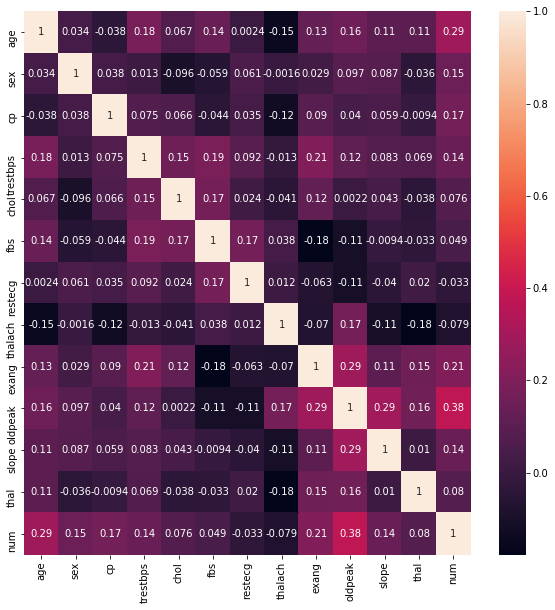

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(hd.corr(),annot=True)
plt.show()


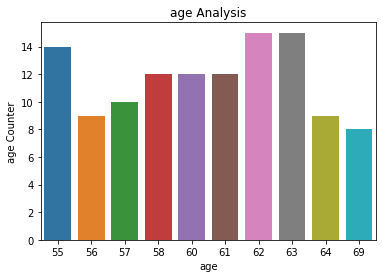

In [54]:
sns.barplot(x=hd.age.value_counts()[:10].index,y=hd.age.value_counts()[:10].values)
plt.xlabel('age')
plt.ylabel('age Counter')
plt.title('age Analysis')
plt.show()

Min age : 35
Max age : 77
Mean age : 59.35
Young ages : 3
Middle ages : 39
Elderly ages : 144


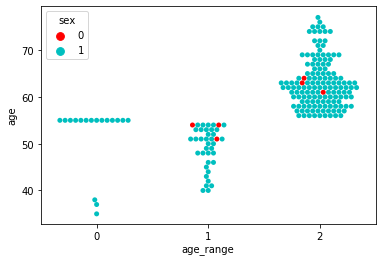

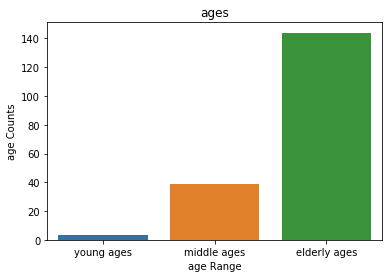

In [55]:

print('Min age :',min(hd.age))
print('Max age :',max(hd.age))
print('Mean age :',hd.age.mean())

young_ages=hd[(hd.age>=29)&(hd.age<40)]
middle_ages=hd[(hd.age>=40)&(hd.age<55)]
elderly_ages=hd[(hd.age>55)]
print('Young ages :',len(young_ages))
print('Middle ages :',len(middle_ages))
print('Elderly ages :',len(elderly_ages))

hd['age_range']=0
youngage_index=hd[(hd.age>=29)&(hd.age<40)].index
middleage_index=hd[(hd.age>=40)&(hd.age<55)].index
elderlyage_index=hd[(hd.age>55)].index
for index in elderlyage_index:
    hd.loc[index,'age_range']=2
    
for index in middleage_index:
    hd.loc[index,'age_range']=1

for index in youngage_index:
    hd.loc[index,'age_range']=0
    
sns.swarmplot(x="age_range", y="age",hue='sex',palette=["r", "c", "y"], data=hd)
plt.show()
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('age Range')
plt.ylabel('age Counts')
plt.title('ages')
plt.show()



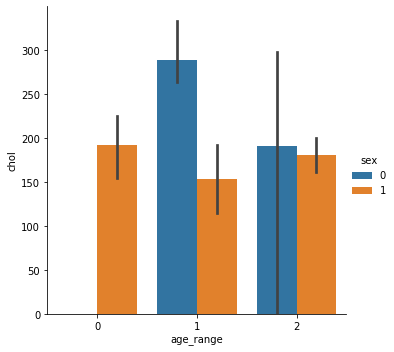

In [56]:
sns.catplot(x="age_range", y="chol",
                 hue="sex",
                 data=hd, kind="bar")
plt.show()

In [57]:
h=[ 'trestbps','chol','fbs','thalach','exang','oldpeak']
for i in h:
    print('Young ages :\n',young_ages.groupby(young_ages['sex'])[i].agg('sum'))
    print('\n')
    print('Middle ages :\n',middle_ages.groupby(middle_ages['sex'])[i].agg('sum'))
    print('\n')
    print('Elderly ages :\n',elderly_ages.groupby(elderly_ages['sex'])[i].agg('sum'))
    print('\n')

Young ages :
 sex
1    361.763889
Name: trestbps, dtype: float64


Middle ages :
 sex
0     379.000000
1    4715.166667
Name: trestbps, dtype: float64


Elderly ages :
 sex
0      415.763889
1    19136.027778
Name: trestbps, dtype: float64


Young ages :
 sex
1    690.0
Name: chol, dtype: float64


Middle ages :
 sex
0     865.000000
1    5509.492228
Name: chol, dtype: float64


Elderly ages :
 sex
0      574.000000
1    25540.984456
Name: chol, dtype: float64


Young ages :
 sex
1    0
Name: fbs, dtype: int32


Middle ages :
 sex
0    2
1    9
Name: fbs, dtype: int32


Elderly ages :
 sex
0     1
1    51
Name: fbs, dtype: int32


Young ages :
 sex
1    392.795918
Name: thalach, dtype: float64


Middle ages :
 sex
0     355.00000
1    4616.55102
Name: thalach, dtype: float64


Elderly ages :
 sex
0      382.795918
1    17049.857143
Name: thalach, dtype: float64


Young ages :
 sex
1    2
Name: exang, dtype: int32


Middle ages :
 sex
0     1
1    24
Name: exang, dtype: int32


Elderly 

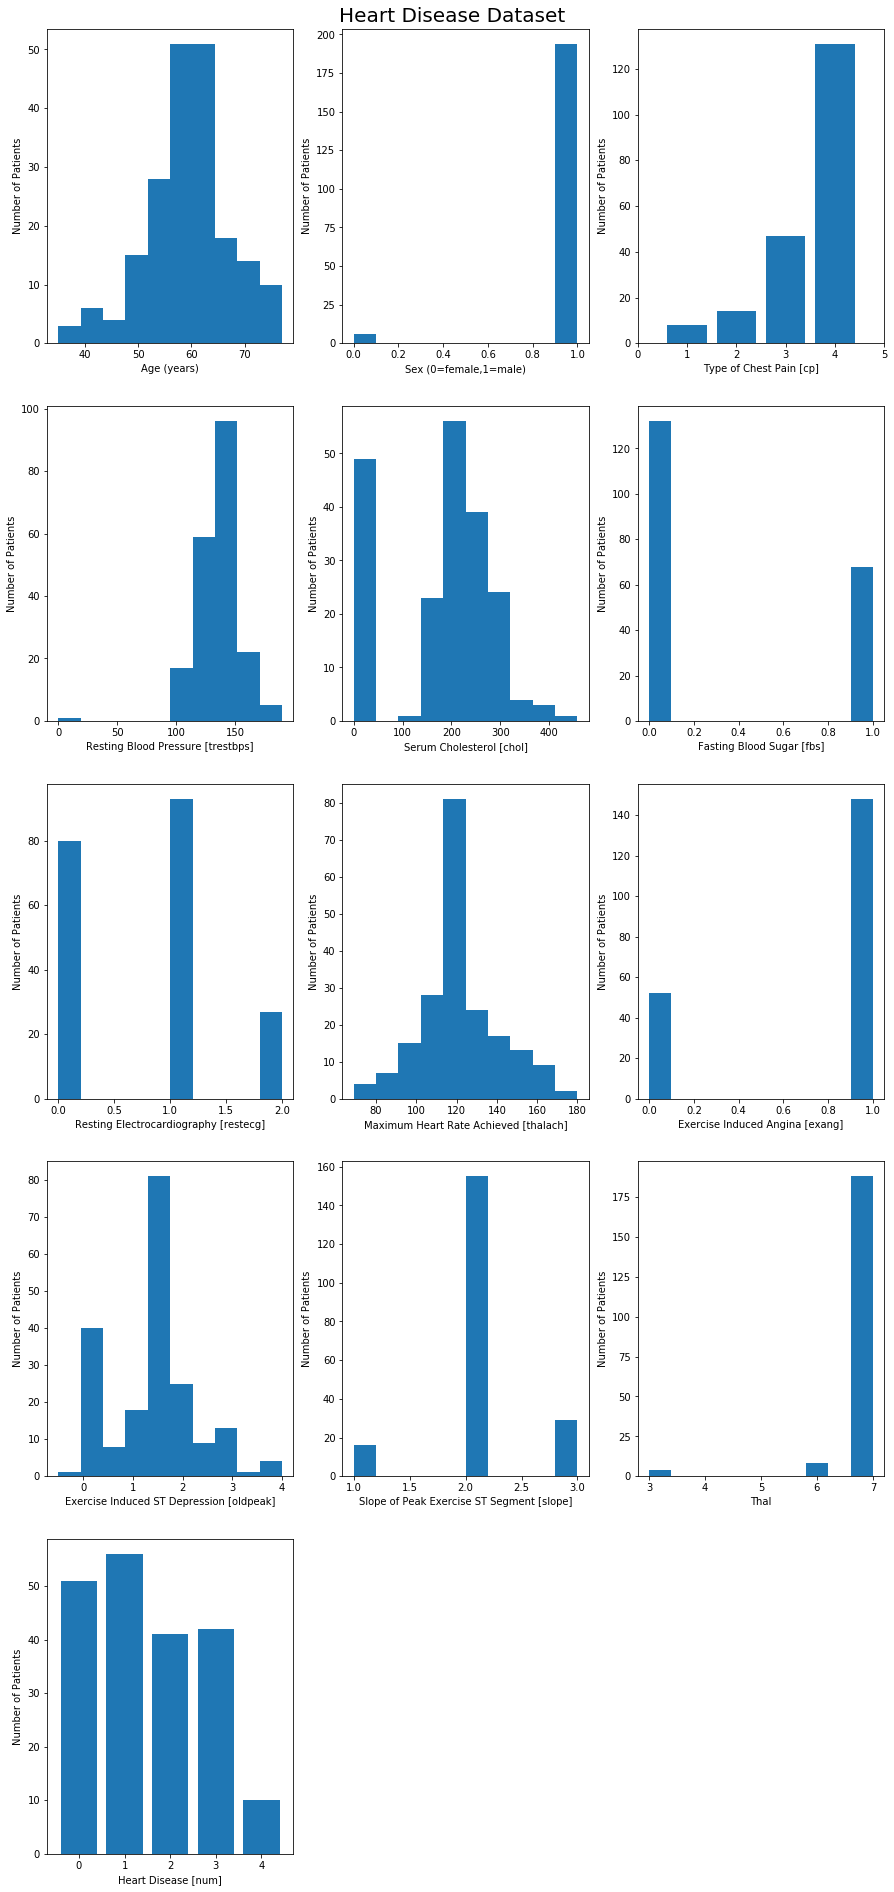

In [58]:
fig, axes = plt.subplots( nrows=5, ncols=3, figsize=(15,30) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Heart Disease Dataset", fontsize=20)

axes[0,0].hist(hd.age)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("Number of Patients")

axes[0,1].hist(hd.sex)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].set_ylabel("Number of Patients")

axes[0,2].hist(hd.cp,bins=4,range=(0.5,4.5),rwidth=0.80)
axes[0,2].set_xlim(0.0,5.0)
axes[0,2].set_xlabel("Type of Chest Pain [cp]")
axes[0,2].set_ylabel("Number of Patients")

axes[1,0].hist(hd.trestbps)
axes[1,0].set_xlabel("Resting Blood Pressure [trestbps]")
axes[1,0].set_ylabel("Number of Patients")

axes[1,1].hist(hd.chol)
axes[1,1].set_xlabel("Serum Cholesterol [chol]")
axes[1,1].set_ylabel("Number of Patients")

axes[1,2].hist(hd.fbs)
axes[1,2].set_xlabel("Fasting Blood Sugar [fbs]")
axes[1,2].set_ylabel("Number of Patients")

axes[2,0].hist(hd.restecg)
axes[2,0].set_xlabel("Resting Electrocardiography [restecg]")
axes[2,0].set_ylabel("Number of Patients")

axes[2,1].hist(hd.thalach)
axes[2,1].set_xlabel("Maximum Heart Rate Achieved [thalach]")
axes[2,1].set_ylabel("Number of Patients")

axes[2,2].hist(hd.exang)
axes[2,2].set_xlabel("Exercise Induced Angina [exang]")
axes[2,2].set_ylabel("Number of Patients")

axes[3,0].hist(hd.oldpeak)
axes[3,0].set_xlabel("Exercise Induced ST Depression [oldpeak]")
axes[3,0].set_ylabel("Number of Patients")

axes[3,1].hist(hd.slope)
axes[3,1].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axes[3,1].set_ylabel("Number of Patients")

axes[3,2].hist(hd.thal)
axes[3,2].set_xlabel("Thal")
axes[3,2].set_ylabel("Number of Patients")

axes[4,0].hist(hd.num,bins=5,range=(-0.5,4.5),rwidth=0.8)
axes[4,0].set_xlim(-0.7,4.7)
axes[4,0].set_xlabel("Heart Disease [num]")
axes[4,0].set_ylabel("Number of Patients")

axes[4,1].axis("off")
axes[4,2].axis("off")

plt.show()

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:52: MatplotlibDeprecationWarning: 
The 'normed' kwarg wa

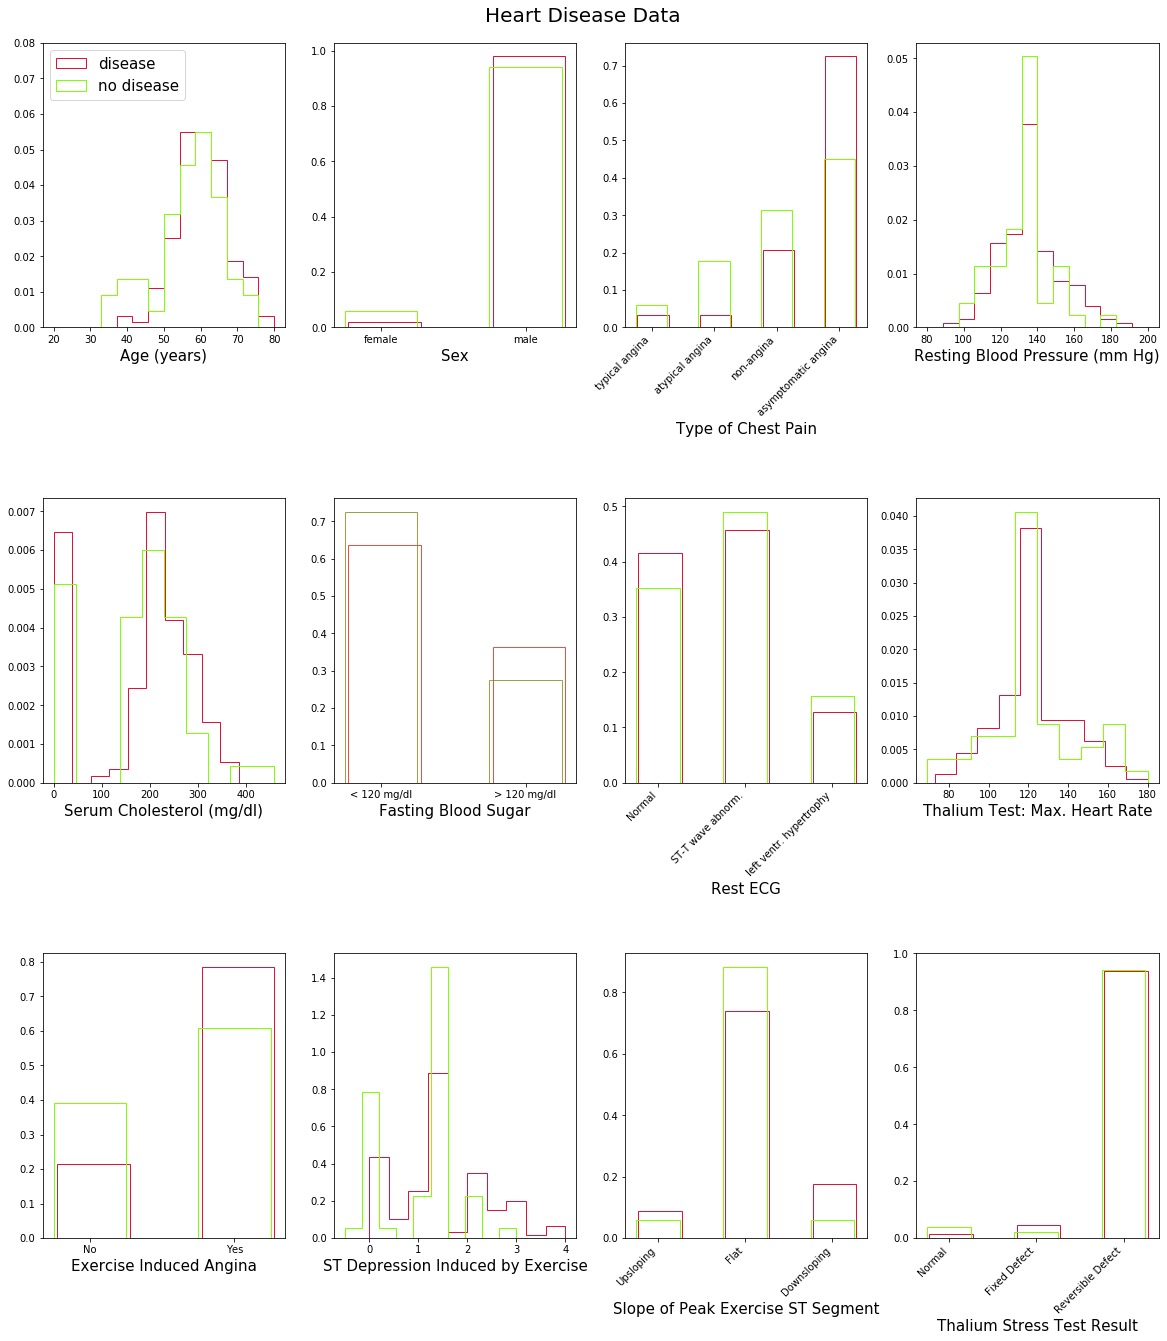

In [59]:
#Feature Distribution comapared for disease and not-disease persons.

fig, axes = plt.subplots( nrows=3, ncols=4, figsize=(20,20) )
plt.subplots_adjust( wspace=0.20, hspace=0.60, top=0.955)
plt.suptitle("Heart Disease Data", fontsize=20)



bins = np.linspace(20, 80, 15)

axes[0,0].hist(hd[hd.num>0].age.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[0,0].hist(hd[hd.num==0].age,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[0,0].set_xlabel("Age (years)",fontsize=15)
axes[0,0].set_ylim(0.0,0.080)
axes[0,0].legend(prop={'size': 15},loc="upper left")


bins = np.arange(2)
width = 0.5
heights1 = hd[hd.num>0]["sex"].groupby(hd["sex"]).count()
heights2 = hd[hd.num==0]["sex"].groupby(hd["sex"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)

axes[0,1].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[0,1].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[0,1].set_xlabel("Sex",fontsize=15)
axes[0,1].set_xticks(bins)
axes[0,1].set_xticklabels(["female","male"],ha="center")


bins = np.arange(4)
width = 0.5
heights1 = hd[hd.num>0]["cp"].groupby(hd["cp"]).count()
heights2 = hd[hd.num==0]["cp"].groupby(hd["cp"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)

axes[0,2].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[0,2].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[0,2].set_xlabel("Type of Chest Pain",fontsize=15)
axes[0,2].set_xticks(bins)
axes[0,2].set_xticklabels(["typical angina", "atypical angina", "non-angina", "asymptomatic angina"],ha="right",rotation=45.)


bins = np.linspace(80, 200, 15)

axes[0,3].hist(hd[hd.num>0].trestbps.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[0,3].hist(hd[hd.num==0].trestbps,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[0,3].set_xlabel("Resting Blood Pressure (mm Hg)",fontsize=15)

axes[1,0].hist(hd[hd.num>0].chol.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[1,0].hist(hd[hd.num==0].chol,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[1,0].set_xlabel("Serum Cholesterol (mg/dl)",fontsize=15)


bins = np.arange(2)
width = 0.5
heights1 = hd[hd.num>0]["fbs"].groupby(hd["fbs"]).count()
heights2 = hd[hd.num==0]["fbs"].groupby(hd["fbs"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)

axes[1,1].bar(bins+0.025,heights1,width,align="center",edgecolor=(0.917,0.083,0,0.75),color=["none"],label="disease")
axes[1,1].bar(bins,heights2,width,align="center",edgecolor=(0.467,0.533,0,0.75),color=["none"],label="no disease")
axes[1,1].set_xlabel("Fasting Blood Sugar",fontsize=15)
axes[1,1].set_xticks(bins)
axes[1,1].set_xticklabels(["< 120 mg/dl","> 120 mg/dl"],ha="center")


bins = np.arange(3)
width = 0.5
heights1 = hd[hd.num>0]["restecg"].groupby(hd["restecg"]).count()
heights2 = hd[hd.num==0]["restecg"].groupby(hd["restecg"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)

axes[1,2].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[1,2].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[1,2].set_xlabel("Rest ECG",fontsize=15)
axes[1,2].set_xticks(bins)
axes[1,2].set_xticklabels(["Normal","ST-T wave abnorm.","left ventr. hypertrophy"],ha="right",rotation=45.)

axes[1,3].hist(hd[hd.num>0].thalach.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[1,3].hist(hd[hd.num==0].thalach,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[1,3].set_xlabel("Thalium Test: Max. Heart Rate",fontsize=15)


bins = np.arange(2)
width = 0.5
heights1 = hd[hd.num>0]["exang"].groupby(hd["exang"]).count()
heights2 = hd[hd.num==0]["exang"].groupby(hd["exang"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)

axes[2,0].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[2,0].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[2,0].set_xlabel("Exercise Induced Angina",fontsize=15)
axes[2,0].set_xticks(bins)
axes[2,0].set_xticklabels(["No","Yes"],ha="center")

axes[2,1].hist(hd[hd.num>0].oldpeak.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[2,1].hist(hd[hd.num==0].oldpeak,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[2,1].set_xlabel("ST Depression Induced by Exercise", fontsize=15)


bins = np.arange(3)
width = 0.5
heights1 = hd[hd.num>0]["slope"].groupby(hd["slope"]).count()
heights2 = hd[hd.num==0]["slope"].groupby(hd["slope"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)

axes[2,2].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[2,2].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[2,2].set_xlabel("Slope of Peak Exercise ST Segment",fontsize=15)
axes[2,2].set_xticks(bins)
axes[2,2].set_xticklabels(["Upsloping","Flat","Downsloping"],ha="right",rotation=45.)


bins = np.arange(3)
width = 0.5
heights1 = hd[hd.num>0]["thal"].groupby(hd["thal"]).count()
heights2 = hd[hd.num==0]["thal"].groupby(hd["thal"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[2,3].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[2,3].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[2,3].set_xlabel("Thalium Stress Test Result",fontsize=15)
axes[2,3].set_xticks(bins)
axes[2,3].set_xticklabels(["Normal","Fixed Defect","Reversible Defect"],ha="right",rotation=45.)
axes[2,3].set_ylim(0.0,1.0)

plt.show()
fig.savefig("plots.png")


In [60]:
print ('\nNumber of patients in dataframe: %i, with heart disease: %i, without heart disease: %i\n' \
      % (len(hd.index),len(hd[hd.num!=0].index),len(hd[hd.num==0].index)))


Number of patients in dataframe: 200, with heart disease: 149, without heart disease: 51



In [61]:
print ('\nNumber of patients in dataframe: %i, with thalassemia disease: %i, without thalassemia disease: %i\n' \
      % (len(hd.index),len(hd[hd.thal==6|7].index),len(hd[hd.thal==3].index)))


Number of patients in dataframe: 200, with thalassemia disease: 188, without thalassemia disease: 4



In [62]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num,age_range
0,63,1,4,140.000000,260.0,0,1,112.000000,1,3.000000,2,7,2,2
1,44,1,4,130.000000,209.0,0,1,127.000000,0,0.000000,2,7,0,1
2,60,1,4,132.000000,218.0,0,1,140.000000,1,1.500000,3,7,2,2
3,55,1,4,142.000000,228.0,0,1,149.000000,1,2.500000,1,7,1,0
4,66,1,3,110.000000,213.0,1,2,99.000000,1,1.300000,2,7,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333.0,1,1,154.000000,0,0.000000,2,7,1,1
196,62,1,1,133.763889,139.0,0,1,122.795918,1,1.320833,2,7,0,2
197,55,1,4,122.000000,223.0,1,1,100.000000,0,0.000000,2,6,2,0
198,58,1,4,133.763889,385.0,1,2,122.795918,1,1.320833,2,7,0,2


In [63]:
del hd['age_range']
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140.000000,260.0,0,1,112.000000,1,3.000000,2,7,2
1,44,1,4,130.000000,209.0,0,1,127.000000,0,0.000000,2,7,0
2,60,1,4,132.000000,218.0,0,1,140.000000,1,1.500000,3,7,2
3,55,1,4,142.000000,228.0,0,1,149.000000,1,2.500000,1,7,1
4,66,1,3,110.000000,213.0,1,2,99.000000,1,1.300000,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333.0,1,1,154.000000,0,0.000000,2,7,1
196,62,1,1,133.763889,139.0,0,1,122.795918,1,1.320833,2,7,0
197,55,1,4,122.000000,223.0,1,1,100.000000,0,0.000000,2,6,2
198,58,1,4,133.763889,385.0,1,2,122.795918,1,1.320833,2,7,0


In [64]:
#Converting categorial values into discrete values
#Note that feature ca is discrete but not categorical, so we don't convert it.
df = hd.copy()
dummies = pd.get_dummies(df["cp"],prefix="cp")
df = df.join(dummies)
del df["cp"]
#del df["cp_4.0"]
df = df.rename(columns = {"cp_1.0":"cp_1","cp_2.0":"cp_2","cp_3.0":"cp_3"})

dummies = pd.get_dummies(df["restecg"],prefix="recg")
df = df.join(dummies)
del df["restecg"]
#del df["recg_0.0"]
df = df.rename(columns = {"recg_1.0":"recg_1","recg_2.0":"recg_2"})

dummies = pd.get_dummies(df["slope"],prefix="slope")
df = df.join(dummies)
del df["slope"]
#del df["slope_2.0"]
df = df.rename(columns = {"slope_1.0":"slope_1","slope_3.0":"slope_3"})

dummies = pd.get_dummies(df["thal"],prefix="thal")
df = df.join(dummies)
del df["thal"]
#del df["thal_3.0"]
df = df.rename(columns = {"thal_6.0":"thal_6","thal_7.0":"thal_7"})
#Replace response variable values and renaming it hc
#The num variable values of 1,2,3,4 are replaced with 1 in order to signify that the patient has heart disease
df["num"].replace(to_replace=[1,2,3,4],value=1,inplace=True)
df = df.rename(columns = {"num":"hc"})

new_columns_1 = ["age", "sex", "trestbps", "chol", "fbs", "thalach", 
                 "exang", "oldpeak", "hc", "cp_1", "cp_2",
                 "cp_3", "recg_1", "recg_2", "slope_1", "slope_3",
                 "thal_6", "thal_7"]

print (df.head())
print (df.describe())

# Standardize the dataframe
stdcols = ["age","trestbps","chol","thalach","oldpeak"]
stddf = df.copy()
stddf[stdcols] = stddf[stdcols].apply(lambda x: (x-x.mean())/x.std())

new_columns_2 = new_columns_1[:9] + new_columns_1[10:]
new_columns_2.insert(0,new_columns_1[9])
stddf = stddf.reindex(columns=new_columns_2)

# Convert dataframe into lists for use by classifiers
yall = stddf["hc"]
Xall = stddf[new_columns_2[1:]].values

   age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  hc  cp_1  ...  \
0   63    1     140.0  260.0    0    112.0      1      3.0   1     0  ...   
1   44    1     130.0  209.0    0    127.0      0      0.0   0     0  ...   
2   60    1     132.0  218.0    0    140.0      1      1.5   1     0  ...   
3   55    1     142.0  228.0    0    149.0      1      2.5   1     0  ...   
4   66    1     110.0  213.0    1     99.0      1      1.3   0     0  ...   

   cp_4  recg_0  recg_1  recg_2  slope_1  slope_2  slope_3  thal_3  thal_6  \
0     1       0       1       0        0        1        0       0       0   
1     1       0       1       0        0        1        0       0       0   
2     1       0       1       0        0        0        1       0       0   
3     1       0       1       0        1        0        0       0       0   
4     0       0       0       1        0        1        0       0       0   

   thal_7  
0       1  
1       1  
2       1  
3       1  
4       

In [65]:
yall

0      1
1      0
2      1
3      1
4      0
      ..
195    1
196    0
197    1
198    0
199    1
Name: hc, Length: 200, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xall, yall, test_size=0.30, random_state=42)

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# For feature creation
poly = PolynomialFeatures(2)

In [68]:
#Importing classifiers
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier


In [69]:
classifiers_ = [
    ("AdaBoost",AdaBoostClassifier()),
    ("Decision Tree", DecisionTreeClassifier(max_depth=10)),
    ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Linear SVM", SVC(kernel="linear", C=0.025,probability=True)),
    ("Naive Bayes",GaussianNB()),
    ("Nearest Neighbors",KNeighborsClassifier(3)),
    ("Neural Net",MLPClassifier(alpha=1)),
    ("QDA", QuadraticDiscriminantAnalysis()),
    ("Random Forest",RandomForestClassifier(n_jobs=2, random_state=1)),
    ("RBF SVM",SVC(gamma=2, C=1,probability=True)),
    ("SGDClassifier", SGDClassifier(max_iter=1000, tol=10e-3,penalty='elasticnet'))
    ]

In [70]:
clf_names = []
train_scores = []
test_scores = []
for n,clf in classifiers_:
    clf_names.append(n)
    # Model declaration with pipeline
    clf = Pipeline([('POLY', poly),('CLF',clf)])
    
    # Model training
    clf.fit(X_train, y_train)
    print(n+" training done!")
    
    # Measure training accuracy and score
    train_scores.append(clf.score(X_train, y_train))
    print(n+" training score done!")
    
     # Measure test accuracy and score
    test_scores.append(clf.score(X_test, y_test))
    print(n+" testing score done!")
    print("---")

AdaBoost training done!
AdaBoost training score done!
AdaBoost testing score done!
---
Decision Tree training done!
Decision Tree training score done!
Decision Tree testing score done!
---
Gaussian Process training done!
Gaussian Process training score done!
Gaussian Process testing score done!
---
Linear SVM training done!
Linear SVM training score done!
Linear SVM testing score done!
---
Naive Bayes training done!
Naive Bayes training score done!
Naive Bayes testing score done!
---
Nearest Neighbors training done!
Nearest Neighbors training score done!
Nearest Neighbors testing score done!
---


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Neural Net training done!
Neural Net training score done!
Neural Net testing score done!
---
QDA training done!
QDA training score done!
QDA testing score done!
---
Random Forest training done!
Random Forest training score done!
Random Forest testing score done!
---
RBF SVM training done!
RBF SVM training score done!
RBF SVM testing score done!
---
SGDClassifier training done!
SGDClassifier training score done!
SGDClassifier testing score done!
---


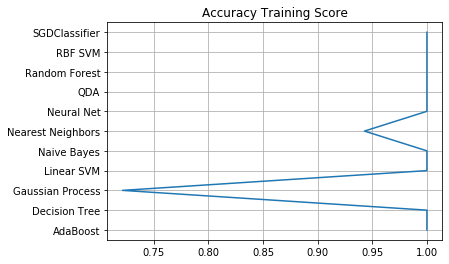

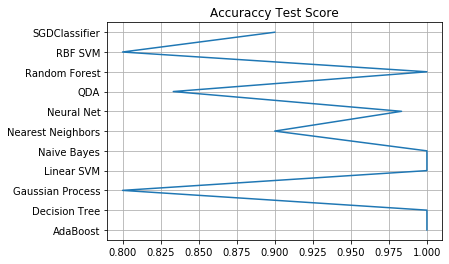

In [71]:
#Plot results
import pylab as plt
plt.title('Accuracy Training Score')
plt.grid()
plt.plot(train_scores,clf_names)
plt.show()

plt.title('Accuraccy Test Score')
plt.grid()
plt.plot(test_scores,clf_names)
plt.show()

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        48

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[12  0]
 [ 0 48]]


In [75]:
rfc.score(X_train, y_train)

1.0

In [76]:
rfc.score(X_test, y_test)

1.0

In [77]:
rfc.predict(X_test).sum()

48

In [78]:
y_test.sum()

48

Train results: confusion matrix
[[ 39   0]
 [  0 101]]


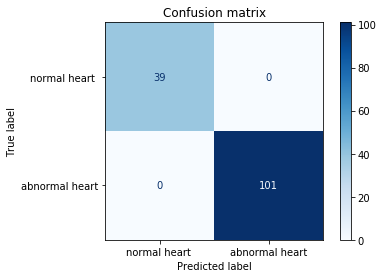

In [79]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(rfc, X_train, y_train,
                             display_labels=['normal heart ','abnormal heart'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')
print('Train results: confusion matrix')
print(disp.confusion_matrix)

Test results: confusion matrix
[[12  0]
 [ 0 48]]


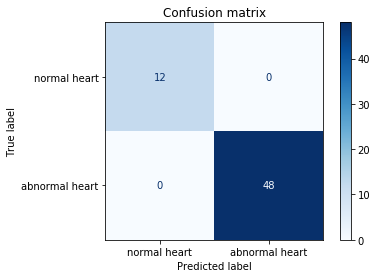

In [80]:
disp = plot_confusion_matrix(rfc, X_test, y_test, 
                             display_labels=['normal heart','abnormal heart'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')

print('Test results: confusion matrix')
print(disp.confusion_matrix)